C:\Users\soswo\AppData\Local\Temp\ipykernel_25748\4269993729.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_data, x='Country', y=metric, palette='Set2')
C:\Users\soswo\AppData\Local\Temp\ipykernel_25748\4269993729.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_data, x='Country', y=metric, palette='Set2')
C:\Users\soswo\AppData\Local\Temp\ipykernel_25748\4269993729.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_data, x='Country', y=metric, palette='Set2')


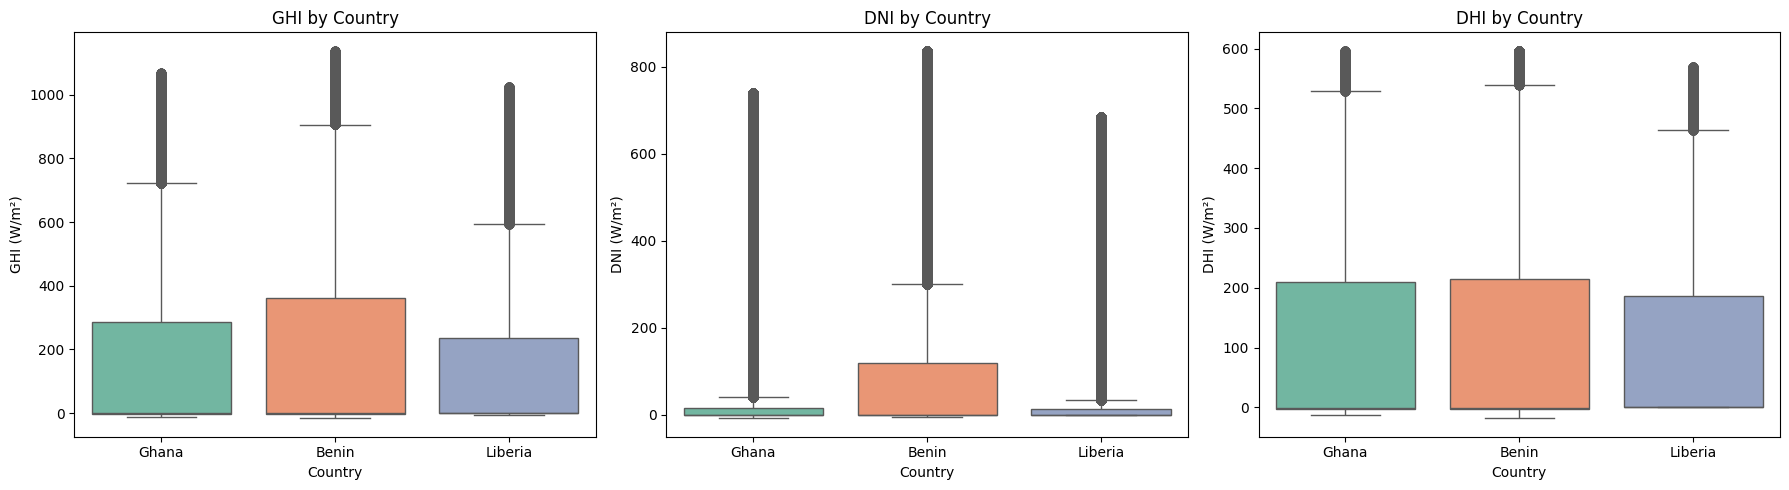

📊 Summary Statistics by Country:

            GHI                    DNI                    DHI               
           mean median     std    mean median     std    mean median     std
Country                                                                     
Benin    200.59   -0.6  298.78  123.56   -0.1  229.25  108.98   -0.7  154.94
Ghana    169.79   -0.4  263.27   87.69   -0.1  187.79  107.25   -0.3  153.35
Liberia  148.55   -0.2  238.83   67.68    0.0  157.88   99.52    0.0  144.72


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
paths = {
    "Ghana": r'C:\Users\soswo\OneDrive\Desktop\projects\solar-challenge-week1\data\processed\Ghana_clean.csv',
    "Benin": r'C:\Users\soswo\OneDrive\Desktop\projects\solar-challenge-week1\data\processed\Benin_clean.csv',
    "Liberia": r'C:\Users\soswo\OneDrive\Desktop\projects\solar-challenge-week1\data\processed\Liberia_clean.csv'
}

# Load and label data
dfs = []
for country, path in paths.items():
    df = pd.read_csv(path, encoding='ISO-8859-1')
    df = df.iloc[1:].copy()  # Drop first row if it contains units
    for col in ['GHI', 'DNI', 'DHI']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    df['Country'] = country
    dfs.append(df[['GHI', 'DNI', 'DHI', 'Country']])

# Combine all into one DataFrame
all_data = pd.concat(dfs, ignore_index=True)

# --- Boxplots for each metric ---
metrics = ['GHI', 'DNI', 'DHI']
plt.figure(figsize=(18, 5))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=all_data, x='Country', y=metric, palette='Set2')
    plt.title(f'{metric} by Country')
    plt.ylabel(f'{metric} (W/m²)')
plt.tight_layout()
plt.show()

# --- Summary Table ---
summary_table = all_data.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
print("📊 Summary Statistics by Country:\n")
print(summary_table)


In [2]:
import pandas as pd
from scipy.stats import f_oneway, kruskal

# Load cleaned datasets
ghana_df = pd.read_csv(r'C:\Users\soswo\OneDrive\Desktop\projects\solar-challenge-week1\data\processed\Ghana_clean.csv')
benin_df = pd.read_csv(r'C:\Users\soswo\OneDrive\Desktop\projects\solar-challenge-week1\data\processed\Benin_clean.csv')
liberia_df = pd.read_csv(r'C:\Users\soswo\OneDrive\Desktop\projects\solar-challenge-week1\data\processed\Liberia_clean.csv')

# Drop first row if it contains units or duplicate headers
ghana_df = ghana_df.iloc[1:]
benin_df = benin_df.iloc[1:]
liberia_df = liberia_df.iloc[1:]

# Convert GHI column to numeric
ghana_df['GHI'] = pd.to_numeric(ghana_df['GHI'], errors='coerce')
benin_df['GHI'] = pd.to_numeric(benin_df['GHI'], errors='coerce')
liberia_df['GHI'] = pd.to_numeric(liberia_df['GHI'], errors='coerce')

# Drop NaNs
ghana_ghi = ghana_df['GHI'].dropna()
benin_ghi = benin_df['GHI'].dropna()
liberia_ghi = liberia_df['GHI'].dropna()

# ANOVA Test
f_stat, p_val_anova = f_oneway(ghana_ghi, benin_ghi, liberia_ghi)
print("One-way ANOVA Results:")
print("F-statistic:", f_stat)
print("p-value:", p_val_anova)

# Kruskal–Wallis Test
h_stat, p_val_kruskal = kruskal(ghana_ghi, benin_ghi, liberia_ghi)
print("\nKruskal–Wallis Test Results:")
print("H-statistic:", h_stat)
print("p-value:", p_val_kruskal)

# Interpretation suggestion
if p_val_anova < 0.05:
    print("\n✅ ANOVA indicates a statistically significant difference in GHI between countries.")
else:
    print("\n❌ ANOVA does not show a statistically significant difference in GHI.")

if p_val_kruskal < 0.05:
    print("✅ Kruskal–Wallis also indicates a statistically significant difference in GHI.")
else:
    print("❌ Kruskal–Wallis does not show a statistically significant difference in GHI.")


One-way ANOVA Results:
F-statistic: 4965.700828974713
p-value: 0.0

Kruskal–Wallis Test Results:
H-statistic: 27346.401549718557
p-value: 0.0

✅ ANOVA indicates a statistically significant difference in GHI between countries.
✅ Kruskal–Wallis also indicates a statistically significant difference in GHI.


### Key Observations

- **GHI:** Benin shows the highest data variability, followed by Ghana and then Liberia. In terms of outliers, Liberia has the most, followed by Ghana, and then Benin.  
- **DNI:** Data variability is similar across Benin, Ghana, and Liberia, but Ghana has noticeably more outliers than the others.  
- **DHI:** Ghana and Benin have comparable levels of data variability, with Liberia showing slightly less. Benin has the fewest high outliers in DHI.


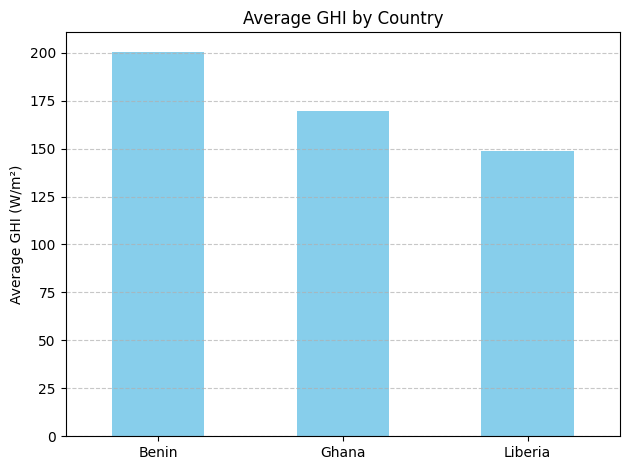

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned datasets
ghana_df = pd.read_csv(r'C:\Users\soswo\OneDrive\Desktop\projects\solar-challenge-week1\data\processed\Ghana_clean.csv')
benin_df = pd.read_csv(r'C:\Users\soswo\OneDrive\Desktop\projects\solar-challenge-week1\data\processed\Benin_clean.csv')
liberia_df = pd.read_csv(r'C:\Users\soswo\OneDrive\Desktop\projects\solar-challenge-week1\data\processed\Liberia_clean.csv')

# Drop header rows if needed
ghana_df = ghana_df.iloc[1:]
benin_df = benin_df.iloc[1:]
liberia_df = liberia_df.iloc[1:]

# Convert GHI to numeric
ghana_df['GHI'] = pd.to_numeric(ghana_df['GHI'], errors='coerce')
benin_df['GHI'] = pd.to_numeric(benin_df['GHI'], errors='coerce')
liberia_df['GHI'] = pd.to_numeric(liberia_df['GHI'], errors='coerce')

# Compute average GHI
avg_ghi = {
    'Ghana': ghana_df['GHI'].mean(),
    'Benin': benin_df['GHI'].mean(),
    'Liberia': liberia_df['GHI'].mean()
}

# Create DataFrame for plotting
avg_ghi_df = pd.DataFrame.from_dict(avg_ghi, orient='index', columns=['Average GHI']).sort_values(by='Average GHI', ascending=False)

# Plot bar chart
avg_ghi_df.plot(kind='bar', legend=False, color='skyblue')
plt.title('Average GHI by Country')
plt.ylabel('Average GHI (W/m²)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- **Benin** shows the most variability in GHI, while **Liberia** is the most stable.
- **Ghana** demonstrates the strongest GHI on average, with high outliers in DNI.
- Panel cleaning has a clearly positive effect on solar panel performance.

